<a href="https://colab.research.google.com/github/vis-hal-k/Data_science_self-Practice/blob/main/Coursera_course/%23C1-IntroToTensorFlow%26ML-AI-DL/week2_assignment/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ungraded Lab: A computer vision Examples
Lets take a look at a scenario where you will build a neural network to recognise different items of clothing, trained from a dataset containing 10 different types.

## Start Coding
Lets start with out import of Tensorflow

In [18]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.12.0


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [19]:
 # Load the Fashion MNIST datset
fmnist = keras.datasets.fashion_mnist

Calling `load_data()`on the object will give you two tuples with two lists each. Thses will be the training and testing values for the graphics that contian the clothing items and their labels.

In [20]:
# Load the training and test split of the fashion MNIST dataset..
(training_images , training_labels ) , (test_images , test_labels) = fmnist.load_data()

What do these values look like ? Let's print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array.

For example, also take a look at index `42`. That's a different boot than the one at index `0` .

LABEL : 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

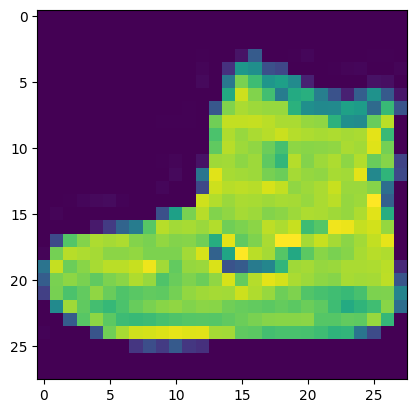

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# You can put between 0 to 59999 her
index = 0
np.set_printoptions(linewidth = 320)
'''
np.set_printoptions(linewidth=320) sets the print options for numpy arrays.
In this case, it sets the maximum width for printing an array to 320 characters,
ensuring that the array is displayed without line breaks.
'''

# # print the label and image
print(f'LABEL : {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')
# # Visualize the image
plt.imshow(training_images[index])


You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called ***normalization*** and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

In [22]:
# Normalize the pixel values of the train and test images.
training_images = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why the dataset is split into two: trraining and testing ? Remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data that the model hasn't yet seen. This will be used to evalute how good it would be at classifying values.

Lets now design the model. There's quite a few new concepts here.But don't worry, you'll get the hang of them.

In [23]:
# Build the classification model.
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation= tf.nn.relu),
                                    tf.keras.layers.Dense(10 , activation= tf.nn.softmax)])

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now:

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0:
  return x

else:
  return 0
```

In other words, it only passes values greater than 0 to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [24]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0 ,3.0 ,4.0 ,2.0]])
display(inputs , type(inputs))
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')
"""
inputs = tf.convert_to_tensor(inputs) converts the NumPy array inputs into a TensorFlow tensor.
This step is necessary to perform TensorFlow operations on the data.
"""

# Feed the inputs to a softmaz activation function...
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function : {outputs .numpy()}')



array([[1., 3., 4., 2.]])

numpy.ndarray

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function : [[0.0320586  0.23688282 0.64391426 0.08714432]]


In [25]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy']
              )
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4948 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3735 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3371 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3140 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2962 - accuracy: 0.8911


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like `0.9098`. This tells you that your neural network is about 91% accurate in classifying the training data. That is, it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images and labels. We can call [`model.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method) with this test dataset as inputs and it will report back the loss and accuracy of the model. Let's give it a try:

In [26]:
# Evalute the model on unseen data
model.evaluate(test_images , test_labels)

313/313 [==============================] - 2s 3ms/step - loss: 0.3530 - accuracy: 0.8753


[0.35303130745887756, 0.8752999901771545]

You can expect the accuracy here to be about `0.88` which mean it was 88% accurate on the entire test set. As expected, it probably would not do well unseen data as it did with data it was trained on! As you go through this course, you'll look at ways to improve this.

# Exploration Exercises

To explore further and deepen your understanding, try the below exercise:

### Exercise 1:
For the first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is list of numbers. why do you think this is, and what do those numbers represent ?

In [27]:
classification = model.predict(test_images)
print(classification[0])

313/313 [==============================] - 1s 3ms/step
[8.7877816e-06 3.7909523e-08 1.8317256e-06 8.5597442e-08 2.5619747e-06 4.7353029e-02 5.1182228e-06 4.9055044e-02 2.4203200e-05 9.0354937e-01]


In [28]:
print(test_labels[0])

9


#### Multiple choice questions

### E1Q1: What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

</p>
</details>

### Exercise 2:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?


In [29]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images , training_labels) , (test_images , test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation= tf.nn.softmax)
                                    ])

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4733
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3566
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3220
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2979
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2814


In [30]:
model.evaluate(test_images , test_labels)
# By increasing the number of neurons the loss function decreases.
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels)

313/313 [==============================] - 1s 3ms/step
[2.2017857e-06 8.7018392e-08 9.3650794e-07 4.9703181e-07 1.1406189e-06 5.4950349e-02 2.3351188e-06 2.8612435e-01 2.7466120e-05 6.5889060e-01]
[9 2 1 ... 8 1 5]


In [31]:
model.predict(test_images).shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

### E2Q1: Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

</p>
</details>

### Exercise 3:

### E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case ?
<details> <summary> Click for Answer </summary>
<p>

#### Answer:
You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network would be same be the same shape as your data. Right now our data is would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1.
Instead of writing all the code to handlethat ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.  
</p>
</details>

In [32]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) , (test_images,test_labels)=fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                    # tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation = tf.nn.softmax)
                                    ])

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy')

model.fit(training_images , training_labels,  epochs = 5)
model.evaluate(test_images , test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])





Epoch 1/5


ValueError: ignored

------------------------------------------------

In above we remove the Flatten Layer then we get an error.

### Exercise 4:

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

<details><summary>Click for Answer</summary>
<p>

#### Answer
You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

</p>
</details>

In [33]:
from keras.backend import categorical_crossentropy
fmnist = tf.keras.datasets.fashion_mnist
(tr_i , tr_la) , (t_i , t_l ) = fmnist.load_data()

tr_i = tr_i/255.0
t_i = t_i / 255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64,activation=tf.nn.relu),
                                     tf.keras.layers.Dense(10,activation = tf.nn.softmax)
                                     ])
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy')
model.fit(tr_i , tr_la , epochs = 5)
model.evaluate(t_i , t_l)
classifications = model.predict(t_i)
print(classifications[0])
print(t_l[0])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5157
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3912
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3523
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3284
Epoch 5/5
313/313 [==============================] - 1s 1ms/step
[1.9335246e-04 1.0590071e-08 5.2158584e-06 4.5331225e-07 5.5674118e-06 9.9263147e-02 1.1420231e-05 5.0954577e-02 9.7404976e-05 8.4946877e-01]
9


In [34]:
model.evaluate(t_i , t_l)

313/313 [==============================] - 1s 2ms/step - loss: 0.3636


0.363585501909256

### Exercise 5:

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

<details><summary>Click for Answer</summary>
<p>

#### Answer
There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

</p>
</details>

In [40]:
fmnist = tf.keras.datasets.fashion_mnist

(tr_i, tr_l) ,  (t_i, t_l) = fmnist.load_data()

tr_i = tr_i/255.0
t_i = t_i/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense (512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
                                  ])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(tr_i, tr_l, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4708
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3556
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3206
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2963
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2790


In [42]:
model.evaluate(t_i , t_l)

313/313 [==============================] - 2s 5ms/step - loss: 0.3163


0.31631800532341003

In [41]:
classifications = model.predict(t_i)
print(classifications[0])
print(t_l[0])

313/313 [==============================] - 1s 3ms/step
[1.4212878e-07 2.2999615e-07 1.3032077e-07 6.8566854e-09 5.6112516e-08 4.7351401e-03 8.0594344e-07 5.6222468e-03 7.1119990e-07 9.8964053e-01]
9


### Exercise 6:

### E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case?

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- you might see the loss value decrease more slowly, and sometimes increases. You'll also likely see that the results of `model.evaluate()` didn't improve much. It can even be slightly worse.

This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)